### Linear Regression

* Lets Understand the importance of F Test in Regression
* T tests for Slope
* Linear Regression Assumptions


### Deploying a Regression

* Import the Data
* Univariate Analysis
* Bivariate Analysis
* Missing Values
* Outlier Analysis and Removal of Outliers.
* Transformation & Scaling (If required)
* **Data Preprocessing Stage**

It means that the data is ready for Modelling

* Modelling
* Linear Regression
* Lasso & Ridge Regression
* Decision Trees, Random Forests, KNN Regressor, Naive Bayes, Bagging, Boosting
* Ensemble Techniques - Random Forests, Stacking..
* Hyperparameter Tuning & Use Lot of CVs..

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
premium = pd.DataFrame({"Mileage":[15,14,17,7,10,7,20,21,18,11,7.9,8.6,12.3,17.1,19.4], 
                        "Engine":[1.8,1.2,1.2,1.8,1.6,1.4,1.2,1.6,1.2,1.6,1.4,1.6,1.2,1.6,1.2],
                        "Age":[2,10,8,3,4,3,7,6,2,5,3,3,2,1,6],
                        "Premium":[392.5,46.2,15.7,422.2,119.4,170.9,56.9,77.5,214,65.3,250,220,217.5,140.88,97.25]})

In [3]:
# Build the model using Mileage and Premium
model = ols("Premium~Mileage", data = premium).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     3.789
Date:                Sun, 17 Jan 2021   Prob (F-statistic):             0.0735
Time:                        08:24:45   Log-Likelihood:                -90.831
No. Observations:                  15   AIC:                             185.7
Df Residuals:                      13   BIC:                             187.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    327.0860     87.035      3.758      0.002     139.057     515.115
Mileage      -11.6905      6.006     -1.947      0.074     -24.665       1.284
==============================================================================
Omnibus:                        3.225   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.770
Skew:                           0.841   Prob(JB):                        0.413
Kurtosis:                       3.057   Cond. No.                         44.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Hypothesis Testing: Anova for Regression

* H0: F test assumes that the model coefficients are 0.
* H1: F test assumes that the model coefficients aren't 0.

* F test is a test of significance in regression. If the pvalue > 0.05 then we fail to reject the Ho.
* It means that the feature used to build the model is not significant.
* It means that it is not a significant contributor to the model.

#### Difference between F test & T Test in Regression

* F test shows the overall significance (considering all the variables) where as T Test shows whether each and every feature is individually important or statistically significant.

### Calculate F Statistic

F Stats = MSR/MSE

* Mean Square Regression = Sum of Square Regression/Predictor Count)
* Mean Square Error = SSE/(n-p-1)



In [10]:
# Sum of Sq Regression = yhat-ybar
# SSE

yhat = -11.6905*premium["Mileage"]+327.0860 # Y hat

SSE = np.sum((premium["Premium"] - yhat)**2) # SSE = yi-yhat

SSR = np.sum((yhat-premium["Premium"].mean())**2) # SSR = yhat - ybar

In [16]:
# Mean Square Regression
MSR = SSR/1 # here 1 is the no of predictors::Mileage

# Mean Square Error
n = premium.shape[0]

MSE = SSE/(n-1-1) #n-p-1

Fstats = MSR/MSE

print("FTest Statistic: ", Fstats)

# Pvalue

print("PValue(F): ",1 - stats.f.cdf(Fstats, 1, n-1-1)) # Dfn, DFd

# Inference: F Test suggests that Mileage is not a Significant Variable.

FTest Statistic:  3.789239534705334
PValue(F):  0.0735202665782958


### Hypothesis Testing: Slope

* HO: Beta1 = 0. It means that the Predictor is not contributing significantly.
* H1: Beta 1 !=0. The Feature is significant for the Model.

Note: T tests are always a two tail test thus, when we calculate the PValue,
we have to Multiply by 2.

In [24]:
# Calculate the T Test Statistic Value
# tstats = Model Coefficient/Std Error

# Pvalue as per the table - 0.074

tstats = -11.6905/6.006 #(Coeff/Std Error)
print("T Test Statistic", tstats)

df = premium.shape[0] - 2 # n-2

print("Pr(t-stats)", (1-stats.t.cdf(np.abs(tstats), df))*2)

# Inference: If the PValue is less than 0.05, we reject Ho meaning that
# Variable is significant.

# As a groundrule, we always check the PValue of all the Predictors
# to decide if the variables are contributing towards the model.

T Test Statistic -1.9464701964701965
Pr(t-stats) 0.07353681873117468


### Confidence Interval for Slope

In [26]:
alpha_by_two = 0.05/2

df = premium.shape[0]-2

# xbar +/-tcrit*SE

# xbar - Model Coefficient

beta1 = -11.6905
se = 6.006

tcrit = np.abs(stats.t.ppf(alpha_by_two, df))
print("TCritical: ", tcrit)

print("Confidence Interval 0.025", np.round(beta1-tcrit*se,4))
print("Confidence Interval 0.975", np.round(beta1+tcrit*se,4))

TCritical:  2.160368656461013
Confidence Interval 0.025 -24.6657
Confidence Interval 0.975 1.2847


## Linear Regression Assumptions

Fit the Model and Check the Assumptions



In [7]:
model = ols("Premium~Mileage+Engine+Age", data = premium).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     5.309
Date:                Sat, 16 Jan 2021   Prob (F-statistic):             0.0166
Time:                        09:53:04   Log-Likelihood:                -86.035
No. Observations:                  15   AIC:                             180.1
Df Residuals:                      11   BIC:                             182.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    138.3977    218.865      0.632      0.540    -343.321     620.116
Mileage       -4.8756      5.252     -0.928      0.373     -16.436       6.684
Engine       137.6328    118.936      1.157      0.272    -124.143     399.409
Age          -23.7176     10.444     -2.271      0.044     -46.704      -0.731
==============================================================================
Omnibus:                        0.101   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.285
Skew:                           0.143   Prob(JB):                        0.867
Kurtosis:                       2.388   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression Assumptions

* Linearity - The Data should be **linear** in nature. It means that the predictors should have a linear relationship with the Target variable.

* Normality - The Data should be **normal**. It means after fitting the model, the residuals/errors should be normally distributed.

* Multicollinearity - The **predictor variables should not have a strong correlation** amongst themselves. Having a strong correlation with target variable is awesome but amongst predictors is a sign of multicollinearity.

* Heteroskedasticity - It simply means **unequal variances**. The residuals should not have unequal variances.

* Autocorrelation - The **errors should not be autocorrelated**. If there is autocorrelation, we would run into assumption that the feature is significant where in reality, it won't be.

In [8]:
# Linear Assumption:: Rainbow Test

# Ho: Data is Linear or the Model shows signs of Linearity.
# H1: Models is not linear. Since it is not linear so regression cannot be applied.

import statsmodels.api as sma

sma.stats.diagnostic.linear_rainbow(model) # test stats, pvalue.

# Rule: PValue< 0.05: Reject the Ho. 
# Inf: Data is Linear.

(4.677948550044173, 0.11587562145871054)

### Residual Plot

* A Residual Plot shows the **Residuals on Y axis** and **Fitted Values(Predicted Values) on the X-Axis.**
* If the points in Residual Plot are randomly scattered showing no pattern then LR is a well built model.
* If the Residual Plot shows some pattern then LR is not a good fit. We must deploy another model.


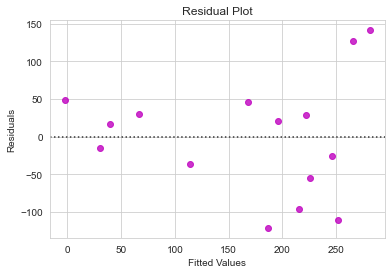

In [9]:
# Residual and Fitted Values
residual = model.resid #(Error: Act-Pred)
fitted = model.fittedvalues # predicted values

# Plotting the Residuals.
sns.set_style("whitegrid") # theme of the plot

sns.residplot(fitted, residual, color = "m") # plt.scatter(fitted, residual, color = "m")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Inference: The plot is showing randomness with no pattern and hence, LR is a good fit.

## 02nd Assumption: Normality | Tests: Shapiro Wilk test of Normality & Jarque Bera Test

* Probplot

* Shapiro Wilk Test of Normality - Applicable till 5000 Rows of Data.
* Jarque Bera Test of Normality (>5000 Rows) - Large Datasets

* **These tests are telling us if the sample pulled out randomly are normally distributed or not.**

* Ho: Data is normal
* H1: Ho is False: Data or Residuals are not normally distributed.

* Inference: If the PValue<0.05, We reject the Ho meaning that the Data is not Normal.



In [10]:
# Shapiro Wilk Test of Normality: TGT & Residual.

stats.shapiro(model.resid) # Residuals are Normally Distributed.
#stats.shapiro(premium["Premium"]) # Tgt Variable is normally Distributed.

ShapiroResult(statistic=0.9564691185951233, pvalue=0.6313204169273376)

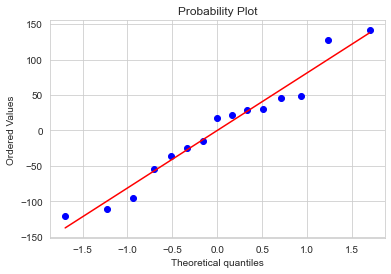

In [11]:
# Probplot
from scipy.stats import probplot

probplot(model.resid, plot = plt)
plt.show() 

# Inferece: Since most of the points are closer to the red line hence, the data is normally distributed.
# If the points deviated from the red line, we can conclude that the data is not normally distributed.

In [12]:
# Jarque Bera Test

# JB test of normality
# Samples pulled out are normally distributed.
# Meant for Samples greater than 5K rows of the data.
# This Test uses Skewness and Kurtosis to find that the data is normal.
# For a Normally Distributed Data, skewness is 0 and Kurtosis is 3.
# Any Deviation from these values is considered to be not normal.

# Ho: Data is Normal & H1: Data is not Normal.

# Applying Jarqe Bera Test on Residuals
print("Test Stats: ", stats.jarque_bera(model.resid)[0])
print("PValue - Jarque Bera: ", stats.jarque_bera(model.resid)[1])

Test Stats:  0.2852794190012313
PValue - Jarque Bera:  0.8670664084149167


### 03: Assumption of Multicollinearity | Condition No, Correlationplot, Variance Inflation Factor (VIF)

* Correlationplot - Create a Heatmap that has correl values for all the variables. We can easily see if there is a strong correlation between the predictors. 

* Condition No: **<100: No Multicollinearity, 100-1000: Moderate Multicollinearity, >1000: High**
* Condition no will tell you if there is Multicollinearity or not but if we really wanna know what all variables are multicollinear, I need to apply VIF.

#### Why there is a Multicollinearity (Causes)

* It exists because maybe the data was not captured correctly.
* For e.g. Income vs Expenses, No of Gadgets vs Income. These things cannot be removed from data.
* It is also seen because of the **variable extracted/created as a part of Feature Engineering.**
* For e.g. BMI on the basis on weight and height. This variable might be important for the model, however, this leads to introduction of Multicollinearity in the data.
* Temp in Celsius & Temp in Farenheit.. (0.90 Correlation)
* **Dummy Variable Trap - Gender (Male/Female):: Gender_Male(0,1) & Gender_Female(0,1). You can have only 1F.**
* Insufficient Data...


#### Is this a Problem

* It is a big problem because if the variables are highly correlated, we would never come to know the contribution of the variables individually. 

* It is because Multicollinearity does not really impact the overall efficiency of the model but it does impact the calculation of SE, T-Test Stat and in turn, PValue. In a nutshell, the model will lose reliability in determining the effects of the predictors on the target.

* What is to be done - Drop one Variable out of the Two.


### Role of VIF

* VIF determines the strength of the correlation between the predictors(ind var). It will take one variable as target vs other predictors (mileage: tgt and age and engine: predictors)
* It is calculated using a variable as target and regressing it against predictors.
* Note: The Original Target Variable is not used in VIF Calculation.
* VIF score tells us how that vairable is explained by other predictors.

* **Thumb Rule: VIF = 1, No Collinearity, 1-5: Moderate, > 5: Highly Collinear**

Tip: Try Feature Selection. Sequential Feature Selector - mlxtend "r2" | CV -10, 15


In [17]:
# Calculate the VIF (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF is applied on Predictors
x = premium.drop(["Mileage","Premium"], axis = 1) #Now, I will remove Mileage too...

mylist =[]

for i in range(x.shape[1]):
    mylist.append(variance_inflation_factor(x.values, i)) # values of the data, instance
    

pd.DataFrame({"Features":x.columns, "VIF": mylist})

,Features,VIF
0,Engine,3.080527
1,Age,3.080527


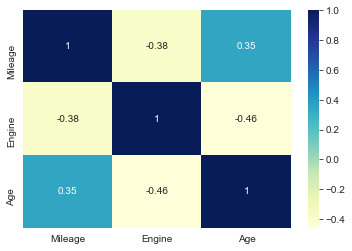

In [14]:
# Correlation plot
sns.heatmap(x.corr(), annot = True, cmap = "YlGnBu")

In [4]:
newmodel = ols("Premium~Age+Engine", data = premium).fit() # Age Adj R2 Score - 0.441
newmodel.summary()

# With Engine & Age, Adj R2 Score has increased.
# Regression Model is significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     7.621
Date:                Sun, 17 Jan 2021   Prob (F-statistic):            0.00731
Time:                        08:24:54   Log-Likelihood:                -86.600
No. Observations:                  15   AIC:                             179.2
Df Residuals:                      12   BIC:                             181.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.1681    189.882      0.206      0.840    -374.548     452.884
Age          -25.8293     10.134     -2.549      0.026     -47.909      -3.749
Engine       166.5562    114.119      1.459      0.170     -82.087     415.200
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   2.446
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.139
Skew:                           0.109   Prob(JB):                        0.933
Kurtosis:                       2.582   Cond. No.                         51.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 04: Assumption - Autocorrelation of Errors

* Error should not be correlated. It means that the Errors in the first instance are related with the 02nd Instance and so forth...

* It might run into a Type 1 error where the analyst feels that the Features are significant wherein they are not.

* The test of Autocorrelation is **Durbin Watson Test**

* The test statistic can throw a value between 0 and 4.
* **Parameters: DW Test Stat = 2, No Correlation, 0-2: +ve ACorrelation, >2 to 4: -ve ACorrel.**
* Thumb Rule - Test Stats is **between 1.5 to 2.5** then we consider it to be normal. Values beyond this range is a sign of Autocorrelation

* Ho: No Autocorrelation in errors/residuals
* H1: Autocorrelation in errors/residuals exist.

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     5.309
Date:                Sat, 16 Jan 2021   Prob (F-statistic):             0.0166
Time:                        10:23:27   Log-Likelihood:                -86.035
No. Observations:                  15   AIC:                             180.1
Df Residuals:                      11   BIC:                             182.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    138.3977    218.865      0.632      0.540    -343.321     620.116
Mileage       -4.8756      5.252     -0.928      0.373     -16.436       6.684
Engine       137.6328    118.936      1.157      0.272    -124.143     399.409
Age          -23.7176     10.444     -2.271      0.044     -46.704      -0.731
==============================================================================
Omnibus:                        0.101   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.285
Skew:                           0.143   Prob(JB):                        0.867
Kurtosis:                       2.388   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

# Inf: Since it is between 1.5 - 2.5, we fail to reject the Ho.

2.3735258408206343

### 05 Assumption : Heteroskedasticity

* It means that the residuals do not have uniform variance. The variance changes at different points.

#### Why it occurs

* It occurs because of the increasing or decreasing patterns in the data. For e.g. Income vs Expenses.
* If observations have mixed scale - ratio scale, weight in kgs, area in square foot, doors in a house. 
* Maybe we have outliers in the data and hence it can contribute to heteroskedastic
* Incorrect Transformation is done on the data
* Skewness is another factor that contributes to Heterskedasticty..

###### Shape: Inward or Outward Funnel showing in residual plot

**Statistics Test**

* Breusch Pagan Test
* GoldFeldQuandt Test

* Ho: Data is Homoskedastic (Uniform Variance) & is not Heteroskedastic(Uneven Variance)
* H1: Data isn't Homoskedastic (Uniform Variance) & is Heteroskedastic(Uneven Variance)

About Breusch-Pagan Test: It will test whether the variance of errors from regression (residuals) are independent of any predictor. Because if it does not, then it will lead to Heteroskedasticity.

In [26]:
 # Heteroskedasticity
    
import statsmodels.stats.api as ssa

predictors = premium.drop("Premium", axis =1 )

# residuals, predictors:: endog, exhog
# Generate 04 statistic - Test Stat of BP, PValue(BP), Ftest & Pvalue(Ftest)
teststats, pvalue, ftest, f_pvalue = ssa.het_breuschpagan(model.resid, 
                                                          predictors) 
print(pvalue)

teststats, pvalue, ftest, f_pvalue = ssa.het_breuschpagan(newmodel.resid, 
                                                          x) 
print(pvalue)

0.006453649980378762


### Conclusion

* Data is Linear & Normal too.
* Data was suffering from Multicollinearity. We removed the variable and saw that R2 value improved.
* There was no Autocorrelation in Residuals.
* However, the Heteroskedasticity is present. 
* Recommendation: One must scale or try transformation on the data and rerun the test.
* We can also check Heteroskedasticity on the newmodel which did not have mileage. Maybe the results are different.

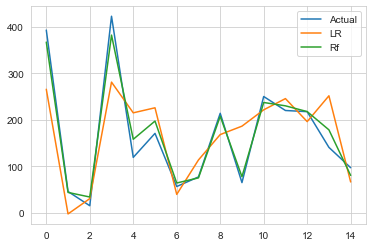

In [29]:
# Linear Regression vs Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
lr = LinearRegression()

predictors = premium.drop("Premium", axis =1 )
tgt = premium.Premium

pred_lr = lr.fit(predictors, tgt).predict(predictors)
pred_rf = rf.fit(predictors, tgt).predict(predictors)



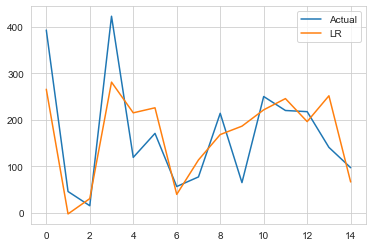

In [30]:
plt.plot(premium.Premium, label = "Actual")
plt.plot(pred_lr, label = "LR")
#plt.plot(pred_rf, label = "Rf")
plt.legend()
plt.show()

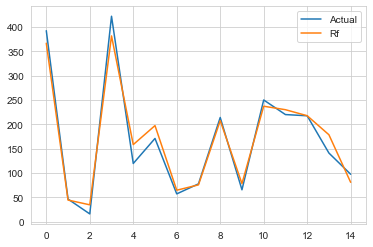

In [31]:
plt.plot(premium.Premium, label = "Actual")
#plt.plot(pred_lr, label = "LR")
plt.plot(pred_rf, label = "Rf")
plt.legend()
plt.show()

### Interaction Effect

1. IE occurs when the effect of one variable influences the other.
2. Lets say if the fuel efficiency along with car types would have been given then a legit interaction effect would be Engine*Fuel_Efficiency.
3. In simple words, if a variable or its properties are complimenting the other variable(s) then such an effect is called Interaction Effect.

Here in this data, we can take engine and age to create an interaction effect..

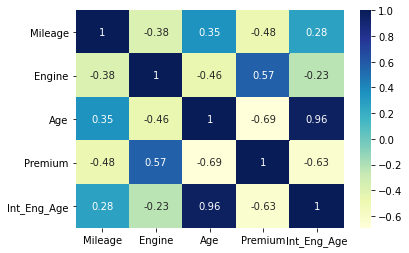

In [9]:
# Interaction Effect
premium["Int_Eng_Age"] = premium["Engine"]*premium["Age"]

sns.heatmap(premium.corr(), annot = True, cmap = "YlGnBu")

In [13]:
# Model 
finalmodel = ols("Premium~Engine+Int_Eng_Age", data = premium).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     8.507
Date:                Sun, 17 Jan 2021   Prob (F-statistic):            0.00501
Time:                        08:26:23   Log-Likelihood:                -86.127
No. Observations:                  15   AIC:                             178.3
Df Residuals:                      12   BIC:                             180.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -45.1692    163.594     -0.276      0.787    -401.610     311.271
Engine        234.2719    101.077      2.318      0.039      14.043     454.501
Int_Eng_Age   -20.8965      7.531     -2.775      0.017     -37.304      -4.489
==============================================================================
Omnibus:                        0.431   Durbin-Watson:                   2.507
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.001
Skew:                          -0.013   Prob(JB):                        0.999
Kurtosis:                       2.967   Cond. No.                         60.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion

* Clearly the Interaction effect has improved the R2score.